# Descripción del proyecto
Has decidido abrir un pequeño café regentado por robots en Los Ángeles. El proyecto es prometedor pero caro, así que tú y tus compañeros decidís intentar atraer inversionistas. Están interesados en las condiciones actuales del mercado.

Eres un gurú del análisis así que te han pedido que prepares un estudio de mercado. Tienes datos procedentes de fuentes abiertas sobre restaurantes en LA.

# Objetivo:  
Identificar si serás capaz de mantener tu éxito cuando la novedad de los camareros robot desaparezca

# Etapas 
 
El proyecto consistirá en cuatro etapas:
 1. Descargar los datos y prepáralos para el análisis
 2. Análisis de datos
 3. Preparar una presentación
 4. Entregar la conclusión general

# Descripción de datos

Tabla rest_data:

- object_name — nombre del establecimiento
- chain — establecimiento que pertenece a una cadena (TRUE/FALSE)
- object_type — tipo de establecimiento
- address — dirección
- number — número de asientos

# Etapa 1. Abrir los archivo con los datos y estudiar la información general

In [ ]:
# Librerias a utilizar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
from plotly import graph_objects as go
import plotly.express as px

In [ ]:
# Carga de archivos 
try:
    rest = pd.read_csv('/content/rest_data_us.csv')
    
except:
    rest = pd.read_csv('/datasets/rest_data_us.csv')

In [ ]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [ ]:
rest['object_name'] = rest['object_name'].str.lower()

In [ ]:
rest.head()

,id,object_name,address,chain,object_type,number
0,11786,habitat coffee shop,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,reilly's,100 WORLD WAY # 120,False,Restaurant,9
2,11788,street churros,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,triniti echo park,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,pollen,2100 ECHO PARK AVE,False,Restaurant,20


In [ ]:
rest.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


In [ ]:
rest.describe(include=object)

,object_name,address,chain,object_type
count,9651,9651,9648,9651
unique,8672,8517,2,6
top,the coffee bean & tea leaf,3607 TROUSDALE PKWY,False,Restaurant
freq,47,11,5972,7255


In [ ]:
rest.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [ ]:
rest[rest['chain'].isnull()]

,id,object_name,address,chain,object_type,number
7408,19194,taqueria los 3 carnales,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,jammin jimmy's pizza,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,the lexington theater,129 E 3RD ST,NaN,Restaurant,35


In [ ]:
rest = rest.dropna(subset=['chain'])

In [ ]:
rest[rest['chain'].isnull()]

,id,object_name,address,chain,object_type,number


In [ ]:
rest.chain = rest.chain.astype(bool)
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   bool  
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 461.7+ KB


<ipython-input-12-4eaabc555320>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest.chain = rest.chain.astype(bool)


In [ ]:
rest.duplicated().sum()

0

# Conclusión
En columna chain al presentar solo 3 valores nulos, se decide eliminar las filas, debido a que no tenía una relevancia para nuestro análisis, además de cambiar el formato de object a booleanos, por lo demás está todo bien.


# Etapa 2. Análisis de datos

## Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.

In [ ]:
rest.head()

,id,object_name,address,chain,object_type,number
0,11786,habitat coffee shop,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,reilly's,100 WORLD WAY # 120,False,Restaurant,9
2,11788,street churros,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,triniti echo park,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,pollen,2100 ECHO PARK AVE,False,Restaurant,20


In [ ]:
# proporciones
proporciones = rest.object_type.value_counts().reset_index()
proporciones.columns = ['establecimiento','cantidad']
proporciones

,establecimiento,cantidad
0,Restaurant,7253
1,Fast Food,1066
2,Cafe,435
3,Pizza,319
4,Bar,292
5,Bakery,283


In [ ]:
fig = go.Figure(data=[go.Pie(labels=proporciones.establecimiento, values=proporciones.cantidad,
                             title="Proporción por tipo de establecimiento")])
fig.update_layout(width=500,height=500)
fig.show();

Al analizar el gráfico de Proporción por tipo de establecimiento, podemos decir que el 75% de los establecimientos son 'Restaurant' seguido por 'Fast Food' con un 11% y 'Cafe' con un 4,51% del total de locales estudiados.


## Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico.

In [ ]:
proporcion = rest.chain.value_counts().reset_index()
proporcion.columns = ['Cadena','cantidad']
proporcion

,Cadena,cantidad
0,False,5972
1,True,3676


In [ ]:
fig = px.pie(proporcion, values=proporcion.cantidad, 
             title='Proporción de establecimiento que pertenecen a una cadena')
fig.show()

El gráfico nos indica que el 61.9% de los locales no pertenecen a una cadena, versus el 38.1% si pertenece a una cadena, del total de locales investigado en la ciudad de los Ángeles.


In [ ]:
# filtro de los establecimientos que pertenecen a una cadena 
verdadero = rest.query('chain == True')
verdadero.head()

,id,object_name,address,chain,object_type,number
8,11794,abc donuts,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,el pollo loco,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,poong nyun bakery,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,emc restaurant group llc,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,cuscatleca bakery,2501 W SUNSET BLVD #A,True,Bakery,26


In [ ]:
# tabla de proporción de establecimiento que pertenecen a una cadena
chain = verdadero.object_type.value_counts().reset_index()
chain.columns = ['establecimiento','cantidad']
chain

,establecimiento,cantidad
0,Restaurant,2292
1,Fast Food,605
2,Bakery,283
3,Cafe,266
4,Pizza,153
5,Bar,77


In [ ]:
fig = go.Figure(data=[go.Pie(labels=chain.establecimiento, values=chain.cantidad,
                             title="Proporción de establecimiento que pertenecen a una cadena")])
fig.update_layout(width=500,height=500)
fig.show()

Como podemos ver en el gráfico los establecimientos que más corresponden a una cadena con un 62,4% es los 'Restaurant', seguido por 'Fast Food' con 16,5% y 'Bakery' con 7,7%

In [ ]:
# filtro de los establecimientos que no pertenecen a una cadena 
falso = rest.query('chain == False')
falso.head()

,id,object_name,address,chain,object_type,number
0,11786,habitat coffee shop,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,reilly's,100 WORLD WAY # 120,False,Restaurant,9
2,11788,street churros,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,triniti echo park,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,pollen,2100 ECHO PARK AVE,False,Restaurant,20


In [ ]:
# tabla de proporciones de establecimientos sin cadena 
no_chain = falso.object_type.value_counts().reset_index()
no_chain.columns = ['establecimiento','cantidad']
no_chain

,establecimiento,cantidad
0,Restaurant,4961
1,Fast Food,461
2,Bar,215
3,Cafe,169
4,Pizza,166


In [ ]:
fig = go.Figure(data=[go.Pie(labels=no_chain.establecimiento, values=no_chain.cantidad,
                             title="Proporción de establecimiento que no pertenecen a una cadena")])
fig.update_layout(width=500,height=500)
fig.show();

Como podemos ver en el gráfico el 83.1% de los establecimientos que no pertenecen a una cadena son 'Restaurant' seguido de 'Fast Food' con un 7,72% y por último 'Bar' con un 3,6%


## ¿Qué tipo de establecimiento es habitualmente una cadena?

In [ ]:
tipo_cadena = rest.groupby('object_type')['chain'].agg(['count','sum']).reset_index()
tipo_cadena['proporcion'] = tipo_cadena['sum']*100/tipo_cadena['count']
tipo_cadena['proporcion'] = tipo_cadena['proporcion'].round()
tipo_cadena

,object_type,count,sum,proporcion
0,Bakery,283,283,100.0
1,Bar,292,77,26.0
2,Cafe,435,266,61.0
3,Fast Food,1066,605,57.0
4,Pizza,319,153,48.0
5,Restaurant,7253,2292,32.0


In [ ]:
tipo_cadena = tipo_cadena.sort_values(by='proporcion', ascending=False)

In [ ]:
fig = px.bar(tipo_cadena, x='object_type', y='proporcion',
             title='Proporción de establecimientos que son cadena de cada tipo de establecimiento')
fig.show()

Como muestra el gráfico, los tipos de establecimientos que son cadenas es las 'Bakery', seguido de 'Cafe' y 'Fast Food'.

## ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

In [ ]:
rest.loc[lambda x: x.object_name.str.lower().str.contains('subway'),"object_name"] = "subway"
rest.loc[lambda x: x.object_name.str.lower().str.contains('starbucks'),"object_name"] = "starbucks"
rest.loc[lambda x: x.object_name.str.lower().str.contains('burger king'),"object_name"] = "burger king"
rest.loc[lambda x: x.object_name.str.lower().str.contains('mcdonald'),"object_name"] = "mcdonald"
rest.loc[lambda x: x.object_name.str.lower().str.contains('pizza hut'),"object_name"] = "pizza hut"
rest.loc[lambda x: x.object_name.str.lower().str.contains('papa john'),"object_name"] = "papa john"

In [ ]:
rest["object_name"].dropna()

0       habitat coffee shop
1                  reilly's
2            street churros
3         triniti echo park
4                    pollen
               ...         
9646        hall of justice
9647            fin-melrose
9648            juicy wingz
9649        medidate coffee
9650           cafe sprouts
Name: object_name, Length: 9648, dtype: object

In [ ]:
# buscador de palabra en una columna 
resultado = rest[rest['object_name'].str.contains('subway')]
resultado.sort_values(by='address', ascending=False)
resultado

,id,object_name,address,chain,object_type,number
40,11826,subway,255 S GRAND AVE STE 101,True,Fast Food,37
82,11868,subway,704 W 1ST ST,True,Fast Food,3
118,11904,subway,508 W 7TH ST,True,Fast Food,4
162,11948,subway,5339 W CENTINELA AVE STE #A,True,Fast Food,24
182,11968,subway,3959 WILSHIRE BLVD STE B-7,True,Fast Food,17
...,...,...,...,...,...,...
8739,20525,subway,11762 SAN VICENTE BLVD,True,Fast Food,23
8744,20530,subway,1821 E CESAR E CHAVEZ ST,True,Fast Food,18
8774,20560,subway,4770 E CESAR CHAVEZ AVE,True,Fast Food,21
8794,20580,subway,5536 E WHITTIER BLVD,True,Fast Food,20


In [ ]:
# código del revisor

pd.set_option('display.max_rows', None)
rest[rest['object_name'].str.contains('subway')]['object_name'].value_counts()

subway    152
Name: object_name, dtype: int64

In [ ]:
# Descripción estadística de la tabla que si son cadena
rest.number.describe()

count    9648.000000
mean       43.703566
std        47.627252
min         1.000000
25%        14.000000
50%        27.000000
75%        46.000000
max       229.000000
Name: number, dtype: float64

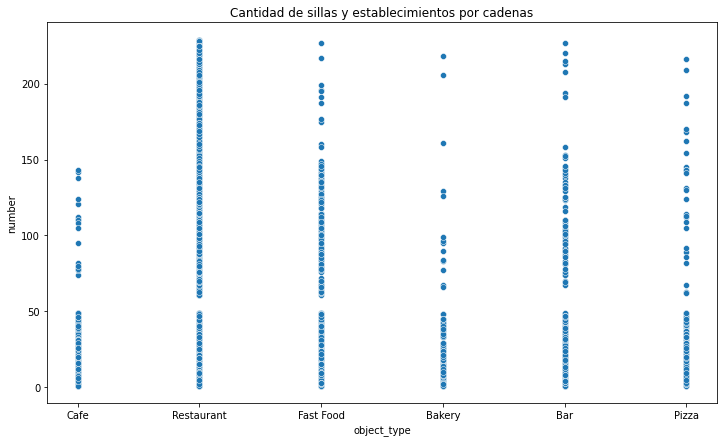

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=rest, x="object_type", y="number")
plt.title ('Cantidad de sillas y establecimientos por cadenas');

## Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.

In [ ]:
rest.head()

,id,object_name,address,chain,object_type,number
0,11786,habitat coffee shop,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,reilly's,100 WORLD WAY # 120,False,Restaurant,9
2,11788,street churros,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,triniti echo park,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,pollen,2100 ECHO PARK AVE,False,Restaurant,20


In [ ]:
asientos_promedio = rest.groupby('object_type')['number'].mean().reset_index()
asientos_promedio

,object_type,number
0,Bakery,21.773852
1,Bar,44.767123
2,Cafe,25.000000
3,Fast Food,31.837711
4,Pizza,28.545455
5,Restaurant,48.048807


In [ ]:
asientos_promedio = asientos_promedio.sort_values(by='number', ascending=False)

In [ ]:
fig = px.bar(asientos_promedio, x='object_type', y='number',
             title='Promedio de número de asientos para cada tipo de establecimiento')
fig.show()

Según lo que muestra el gráfico es, que el establecimiento con mayor número de asientos son los restaurantes, junto con los bares, esto era de suponerse debido a que son los que más espacios deben tener debido al público objetivo que buscan que es familiar y de distracción


## Coloca los datos de los nombres de las calles de la columna address en una columna separada.

In [ ]:
rest['street'] = rest['address'].str.extract(pat='([a-zA-Z][\w ]+(?!STE|UNIT|MEZZ|[\w ]+))')
rest['street'] = rest['street'].str.strip()
rest.head()

,id,object_name,address,chain,object_type,number,street
0,11786,habitat coffee shop,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,reilly's,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,street churros,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,triniti echo park,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,pollen,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


Estimado revisor, este código me lo envió un tutor y se demoró 2 días en enviármelo, pedirle que quite una letra de la calle, sería retrasarme más de lo que estoy, debido a que tengo que realizar el proyecto integrado 2, si me puedes ayudar con el código te lo agradecería

## Traza un gráfico de las diez mejores calles por número de restaurantes.

In [ ]:
street = rest.street.value_counts().head(10).reset_index()
street.columns = ['calle' ,'numero']
street

,calle,numero
0,W SUNSET BLVD,327
1,W PICO BLVD,313
2,WILSHIRE BLVD,245
3,SANTA MONICA BLVD,211
4,S WESTERN AVE,208
5,HOLLYWOOD BLVD,203
6,W 3RD ST,183
7,S FIGUEROA ST,178
8,S VERMONT AVE,177
9,W OLYMPIC BLVD,163


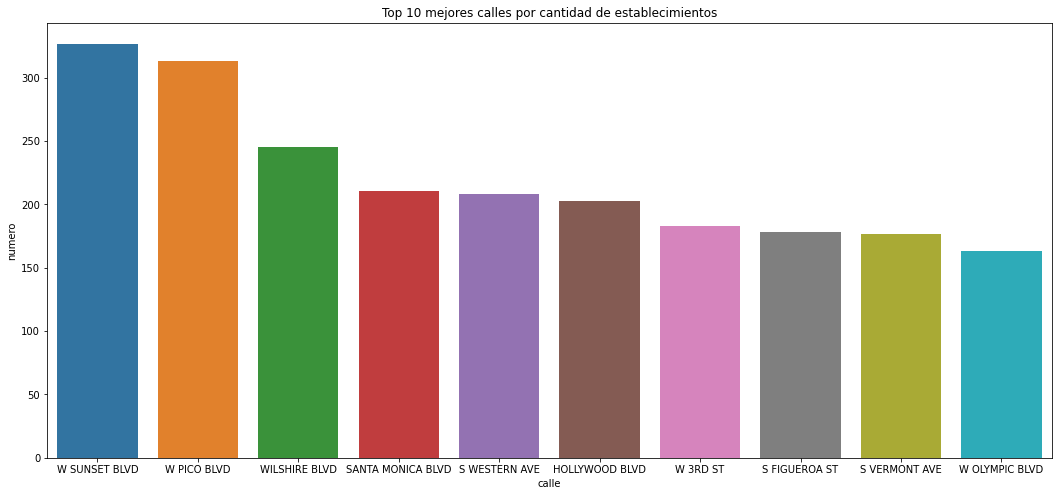

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Top 10 mejores calles por cantidad de establecimientos')
sns.barplot(
    data=street,
    y='numero',
    x='calle'
);

Según el gráfico podemos ver que las calles con más establecimientos son 'W PICO BLVD' y W 'SUNSET' BLVD, por la cantidad de establecimientos podemos deducir que son calles con alta concentración de personas.


## Encuentra el número de calles que solo tienen un restaurante.

In [ ]:
establecimiento_1 = rest.street.value_counts().reset_index()
establecimiento_1.columns=['calle','cantidad']
establecimiento_1.head()

,calle,cantidad
0,W SUNSET BLVD,327
1,W PICO BLVD,313
2,WILSHIRE BLVD,245
3,SANTA MONICA BLVD,211
4,S WESTERN AVE,208


In [ ]:
uno = establecimiento_1.query('cantidad == 1')
uno.cantidad.sum()

1215

La cantidad de calles con un establecimiento son 1.215


## Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

In [ ]:
rest.head()

,id,object_name,address,chain,object_type,number,street
0,11786,habitat coffee shop,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,reilly's,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,street churros,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,triniti echo park,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,pollen,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


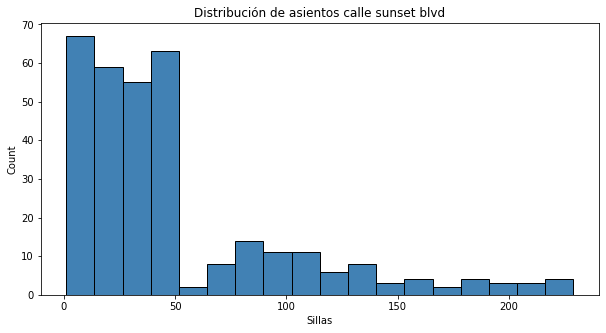

In [ ]:
calle_sunset = rest.query('street == "W SUNSET BLVD"')
plt.figure(figsize=(10, 5))
sns.histplot(calle_sunset, x='number', color='#01579B')
plt.title('Distribución de asientos calle sunset blvd')
plt.xlabel('Sillas');

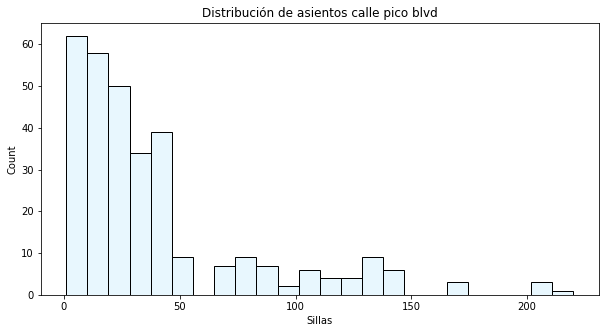

In [ ]:
calle_pico = rest.query('street == "W PICO BLVD"')
plt.figure(figsize=(10, 5))
sns.histplot(calle_pico, x='number', color='#E1F5FE')
plt.title('Distribución de asientos calle pico blvd')
plt.xlabel('Sillas');

Después de comparar los gráficos podemos decir que en ambos casos el promedio de sillas que tienen va entre los 0 a 50 sillas, la calle 'PICO' tiene mas cantidad de locales en ese parametro y menos locales de 50 a 229 sillas que la calle 'SUNSET'


# Etapa 3. presentación

https://drive.google.com/file/d/1pBhPFDjdzN4ewMg1hemcoMezn1bTCTF3/view?usp=sharing

# Conclusión Final

Después de analizar los distintos datos y gráficos del proyecto, concluimos que:
* Los cafés están situados en 3.er lugar dentro del mercado de Los Ángeles
* Su participación de mercado aumenta cuando pertenecen a una cadena
* Es el establecimiento con la menor cantidad de sillas dentro del mercado, con un promedio de 25 sillas
* Incluir robots puede ser todo un éxito debido a la novedad

Después de estudiar los puntos analizados se recomienda realizar la inversión de abrir un café con robots, si bien la inversión inicial es alta, después los costos se mantendrán de manera fija, contar al menos con 25 sillas, para evaluar el movimiento de los robots y la automatización del mismo, dentro del café, La idea de desarrollar una cadena es de alto potencial debido a la automatización del negocio, además que genera una barrera de entrada el alto costo de inversión, pudiendo el día de mañana convertirse en una franquicia para así poder rentabilizar aún más el negocio. Entregando una experiencia nueva a los usuarios.